In [1]:
import kid_readout.analysis.archive

updated file list


/home/local/lib/python2.7/site-packages/matplotlib/__init__.py:1155: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
pkl = kid_readout.analysis.archive.load_noise_pkl('/home/data/pkl/2015-04-23_110005_mmwnoisestep.pkl')

In [4]:
pkl = pkl['noise_on_measurements']

In [6]:
nm = pkl[0]

In [7]:
nm.atten

41.0

In [11]:
a38 = [nm for nm in pkl if nm.atten==38]

In [12]:
nm = a38[0]

In [13]:
ff = nm.fractional_fluctuation_timeseries

In [14]:
ff.shape

(524288,)

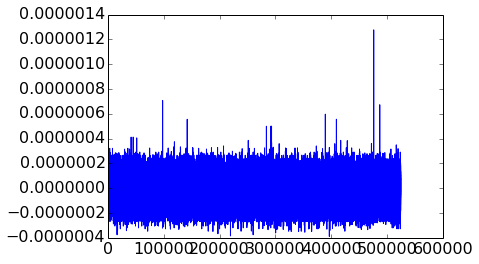

In [15]:
plot(ff.real)

In [16]:
import kid_readout.analysis.noise_measurement

In [22]:
nms = [kid_readout.analysis.noise_measurement.SweepNoiseMeasurement('/home/data2/2015-04-23_110005_mmwnoisestep.nc',
                                                                  sweep_group_index=1,
                                                                  timestream_group_index=1,
                                                                  deglitch_threshold=None,
                                                                  delay_estimate=-64.,
                                                                  resonator_index=k)
                                                                  for k in range(16)]
                                                                  
                                                                  

using NFFT: 2** 16.0
10
using NFFT: 2** 16.0
10
using NFFT: 2** 16.0
10
using NFFT: 2** 16.0
10
using NFFT: 2** 16.0
10
using NFFT: 2** 16.0
10
using NFFT: 2** 16.0
10
using NFFT: 2** 16.0
10
using NFFT: 2** 16.0
10
using NFFT: 2** 16.0
10
using NFFT: 2** 16.0
10
using NFFT: 2** 16.0
10
using NFFT: 2** 16.0
10
using NFFT: 2** 16.0
10
using NFFT: 2** 16.0
10
using NFFT: 2** 16.0
10


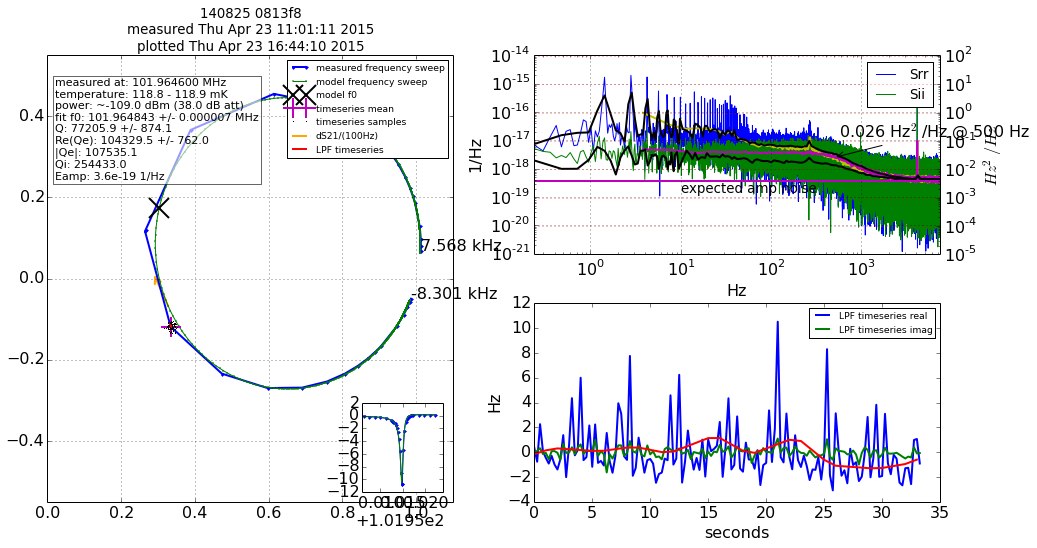

In [24]:
blah = nms[1].plot()

In [25]:
nm = nms[1]

In [26]:
ff = nm.fractional_fluctuation_timeseries

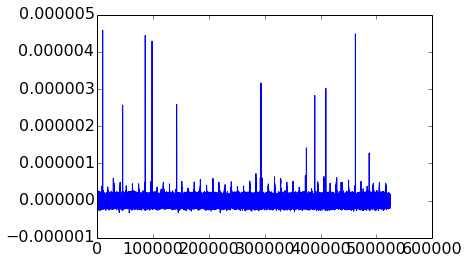

In [29]:
plot(ff.real)

(-1, 1)

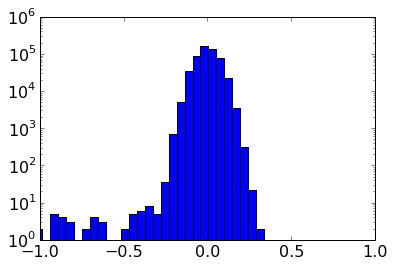

In [34]:
blah = hist(ff.imag*1e6,bins=200,log=True)
xlim(-1,1)

In [35]:
from kid_readout.utils.filters import low_pass_fir

In [61]:
fl = low_pass_fir(ff,num_taps=1024,cutoff = .125,decimate_by=8)

In [62]:
pxx,fr = mlab.psd(fl.real,NFFT=2**16,Fs=256e6/2**14/8)

(1e-19, 1e-15)

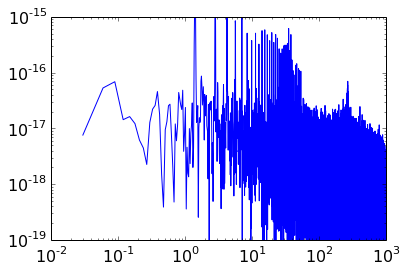

In [63]:
loglog(fr,pxx)
ylim(1e-19,1e-15)

In [64]:
fl.shape

(65408,)

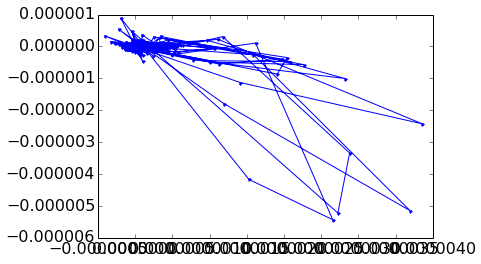

In [65]:
plot(fl.real,fl.imag,'.-')

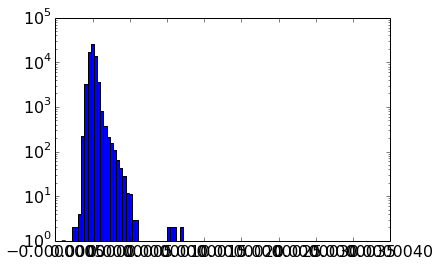

In [66]:
blah = hist(fl.real,bins=100,log=True)

In [68]:
pkloc =ff.real.argmax()

In [92]:
pkloc=18500

In [147]:
ffs = np.vstack([nm.fractional_fluctuation_timeseries[pkloc-1000:pkloc+1000] for nm in nms])

In [148]:
ffs.shape

(16, 2000)

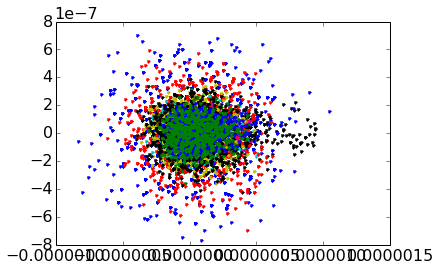

In [149]:
plot(ffs.T.real,ffs.T.imag,'.')
#xlim(900,1100)

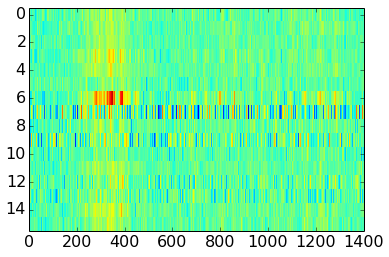

In [162]:
imshow(ffs[:,600:].real,aspect='auto',interpolation='nearest')

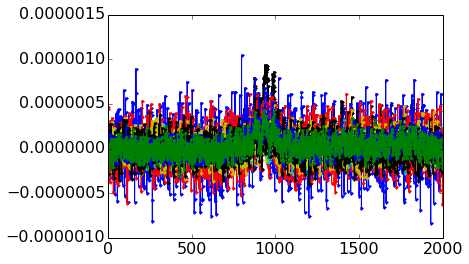

In [151]:
plot(ffs.T.real,'.-')
#xlim(980,1050)

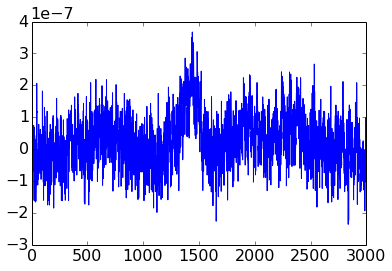

In [152]:
plot(ff.real[17000:20000])

In [153]:
ff6 = nms[6].fractional_fluctuation_timeseries

In [154]:
lf6 = low_pass_fir(ff6,1024,1/256.,decimate_by=256)

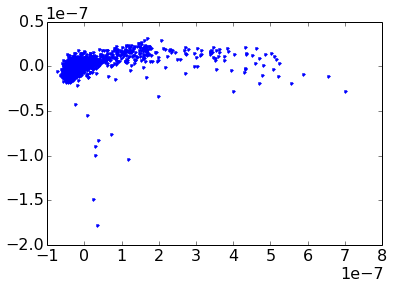

In [155]:
plot(lf6.real,lf6.imag,'.')

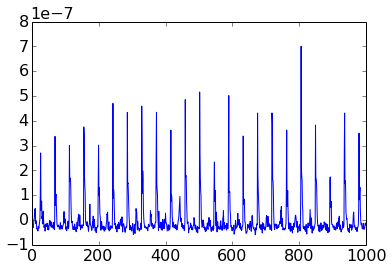

In [156]:
plot(lf6.real[:1000])

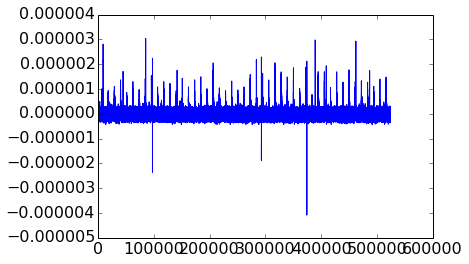

In [157]:
plot(ff6.real)

In [158]:
nm6 = nms[6]

In [159]:
nm6.fit_params['f_0']

<Parameter 'f_0', value=195.71655918852721 +/- 1.49e-05, bounds=[195.69189453125:195.739501953125]>

In [167]:
nms[13].fit_params['f_0']

<Parameter 'f_0', value=164.08744995652489 +/- 7.42e-06, bounds=[164.06298828125:164.110595703125]>

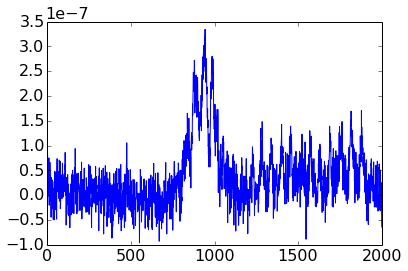

In [161]:
plot(ffs.real.mean(0))

In [168]:
rnc = kid_readout.utils.readoutnc.ReadoutNetCDF('/home/data2/2015-04-24_144604_mmwnoisestep.nc')

In [170]:
[ts.zbd_voltage for ts in rnc.timestreams]

[array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.]),
 array([ -4.76841000e-07,  -4.76841000e-07,  -4.76841000e-07,
         -4.76841000e-07,  -4.76841000e-07,  -4.76841000e-07,
         -4.76841000e-07,  -4.76841000e-07,  -4.76841000e-07,
         -4.76841000e-07,  -4.76841000e-07,  -4.76841000e-07,
         -4.76841000e-07,  -4.76841000e-07,  -4.76841000e-07,
         -4.76841000e-07]),
 array([ -4.76841000e-07,  -4.76841000e-07,  -4.76841000e-07,
         -4.76841000e-07,  -4.76841000e-07,  -4.76841000e-07,
         -4.76841000e-07,  -4.76841000e-07,  -4.76841000e-07,
         -4.76841000e-07,  -4.76841000e-07,  -4.76841000e-07,
         -4.76841000e-07,  -4.76841000e-07,  -4.76841000e-07,
         -4.76841000e-07]),
 array([ 0.,  0.,  0.,  0.,  0

In [173]:
len(rnc.timestreams)

9

In [174]:
len(rnc.sweeps)

8

In [181]:
offs = [kid_readout.analysis.noise_measurement.SweepNoiseMeasurement('/home/data2/2015-04-24_171612_mmwnoisestep.nc',
                                                                  sweep_group_index=7,
                                                                  timestream_group_index=8,
                                                                  deglitch_threshold=None,
                                                                  delay_estimate=-64.,
                                                                  resonator_index=k)
                                                                  for k in range(16)]


log file is: /home/data/SRS/20150420-113534.txt, last requested time is Fri Apr 24 17:25:53 2015
log file is: /home/data/SRS/20150420-113534.txt, last requested time is Fri Apr 24 17:30:53 2015
using NFFT: 2** 16.0
10
log file is: /home/data/SRS/20150420-113534.txt, last requested time is Fri Apr 24 17:25:53 2015
log file is: /home/data/SRS/20150420-113534.txt, last requested time is Fri Apr 24 17:30:53 2015
using NFFT: 2** 16.0
10
log file is: /home/data/SRS/20150420-113534.txt, last requested time is Fri Apr 24 17:25:53 2015
log file is: /home/data/SRS/20150420-113534.txt, last requested time is Fri Apr 24 17:30:53 2015
using NFFT: 2** 16.0
10
log file is: /home/data/SRS/20150420-113534.txt, last requested time is Fri Apr 24 17:25:53 2015
log file is: /home/data/SRS/20150420-113534.txt, last requested time is Fri Apr 24 17:30:53 2015
using NFFT: 2** 16.0
10
log file is: /home/data/SRS/20150420-113534.txt, last requested time is Fri Apr 24 17:25:53 2015
log file is: /home/data/SRS/201

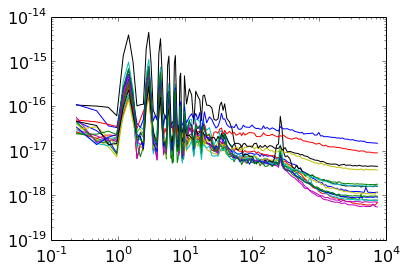

In [182]:
for off in offs:
    loglog(off.pca_freq,off.pca_eigvals[1,:])

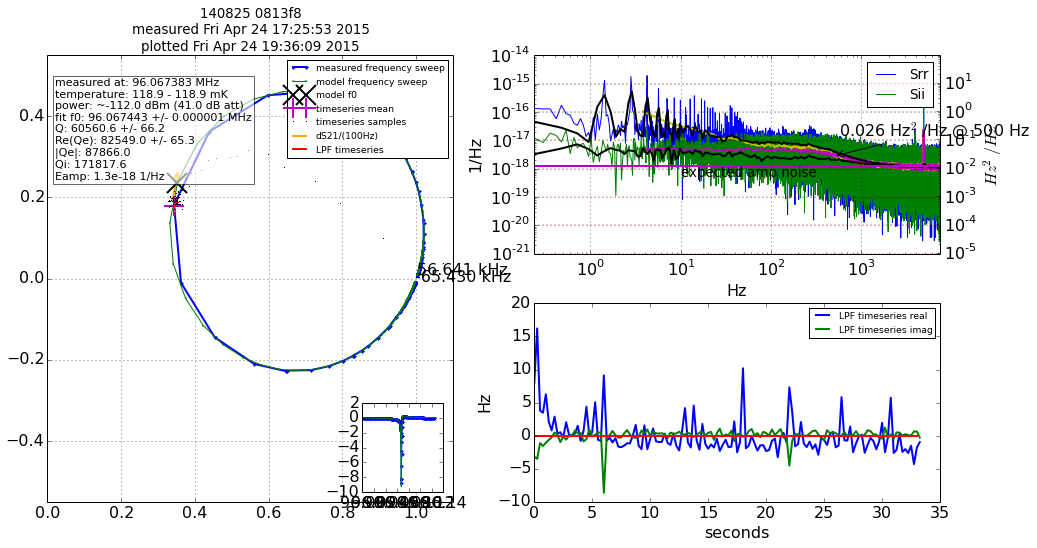

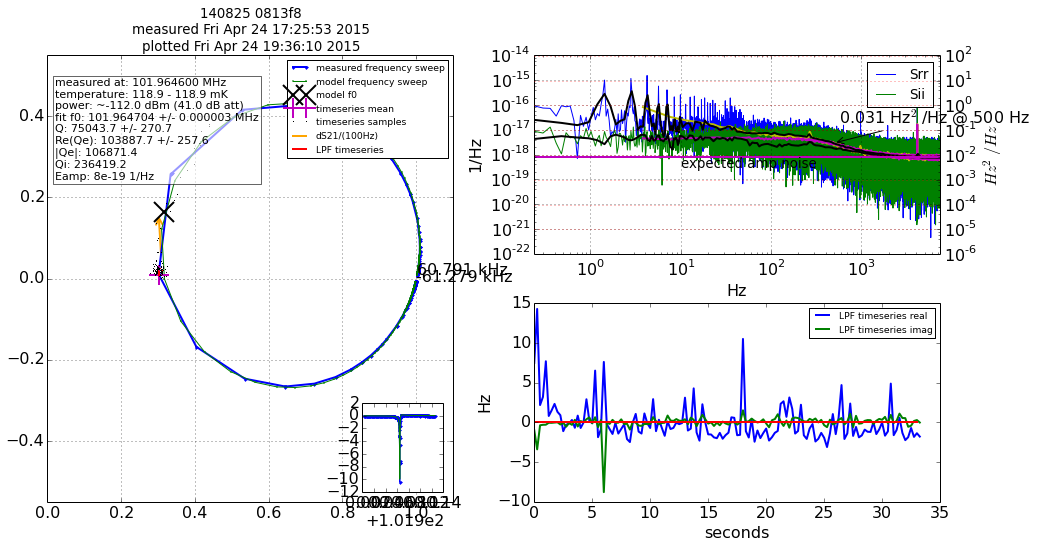

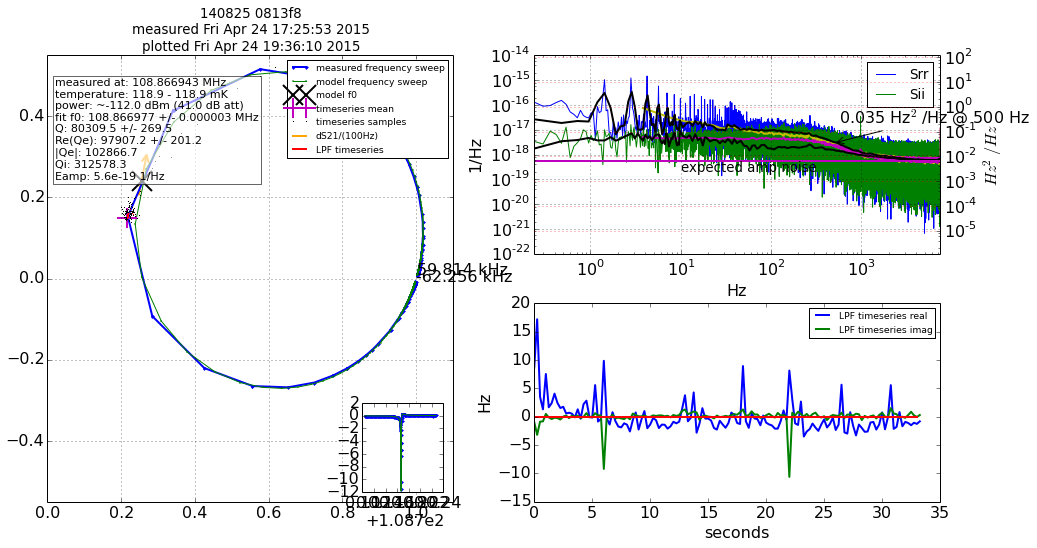

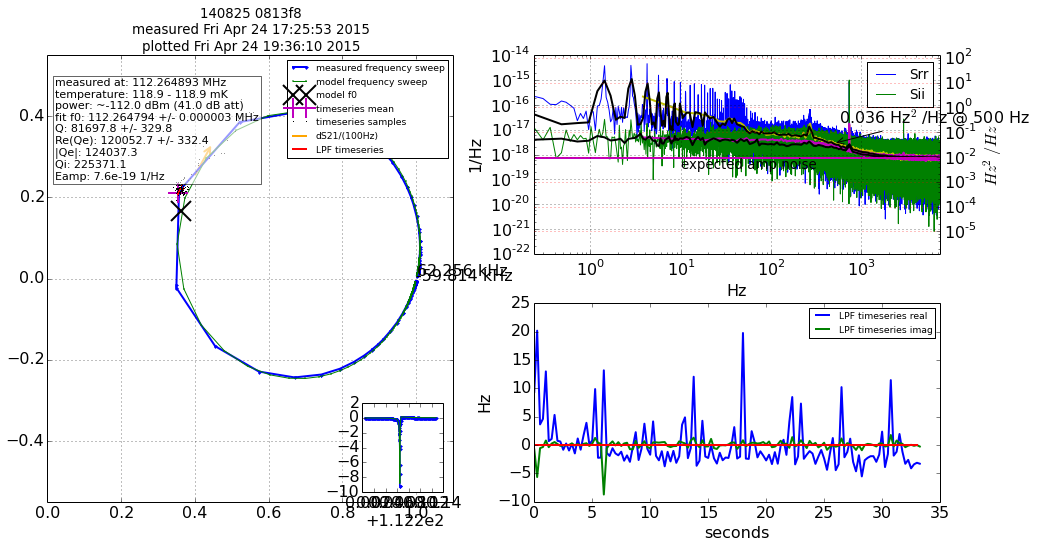

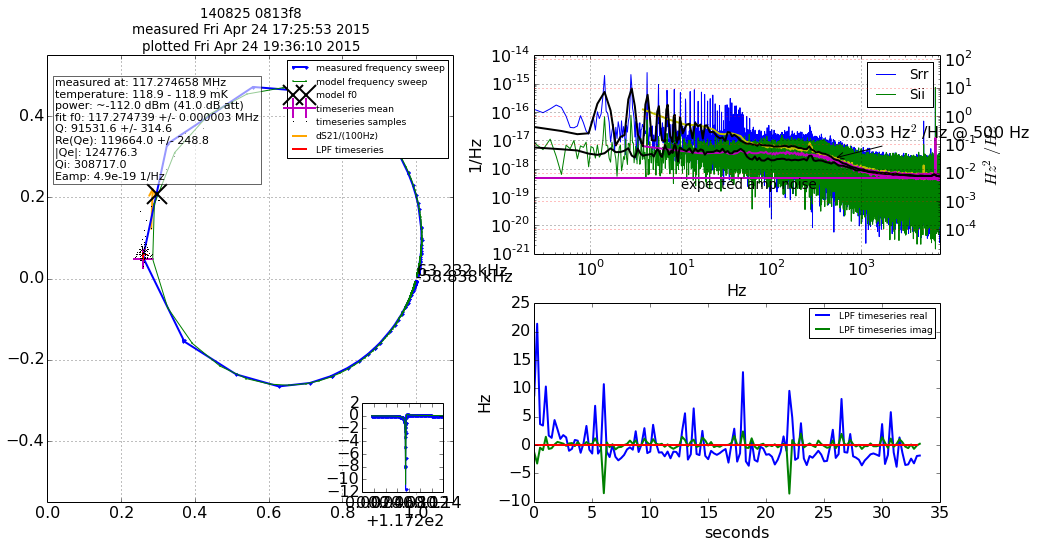

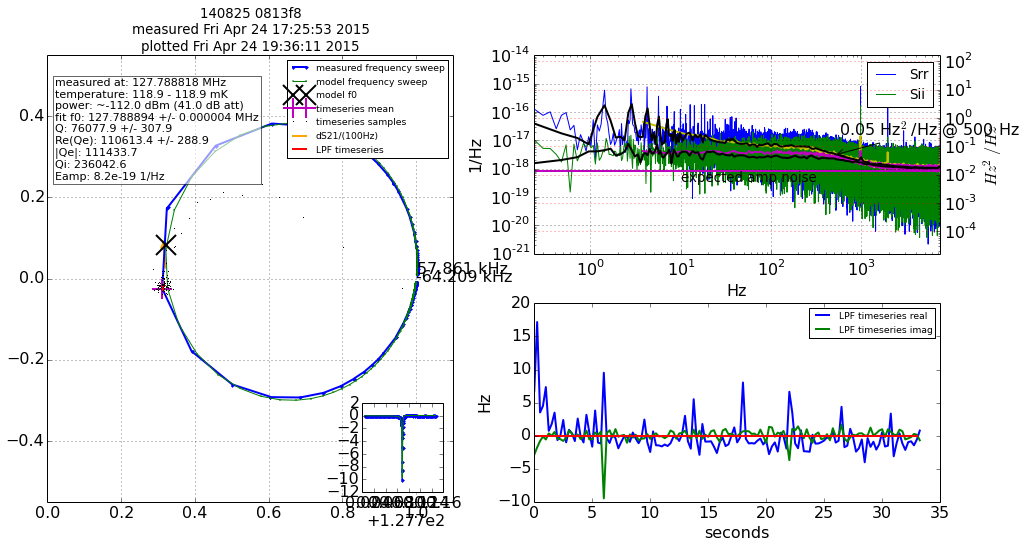

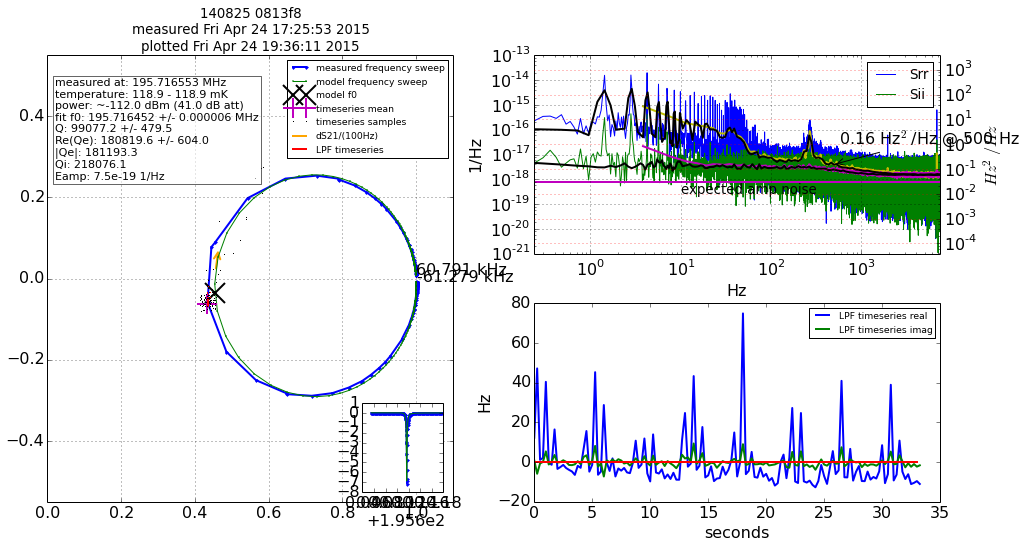

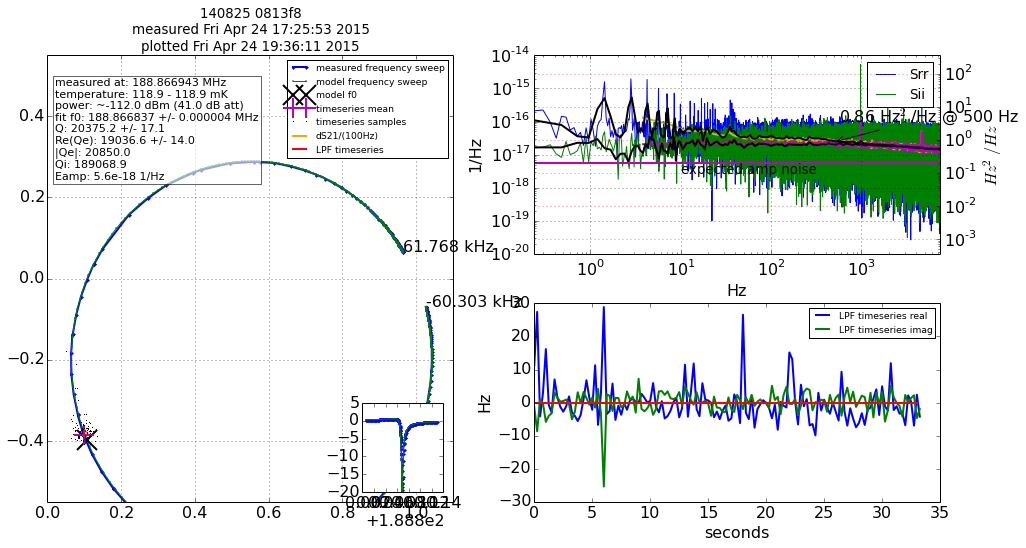

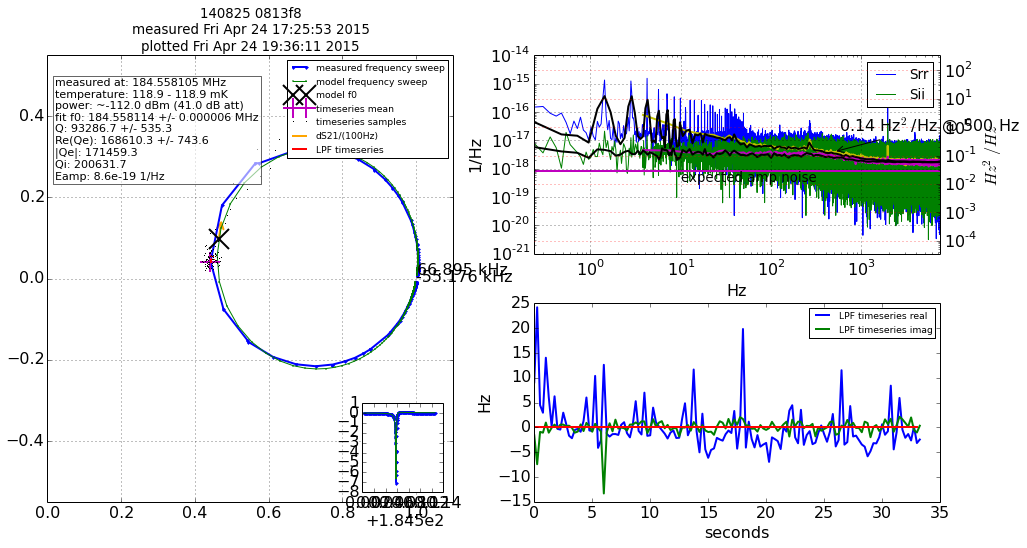

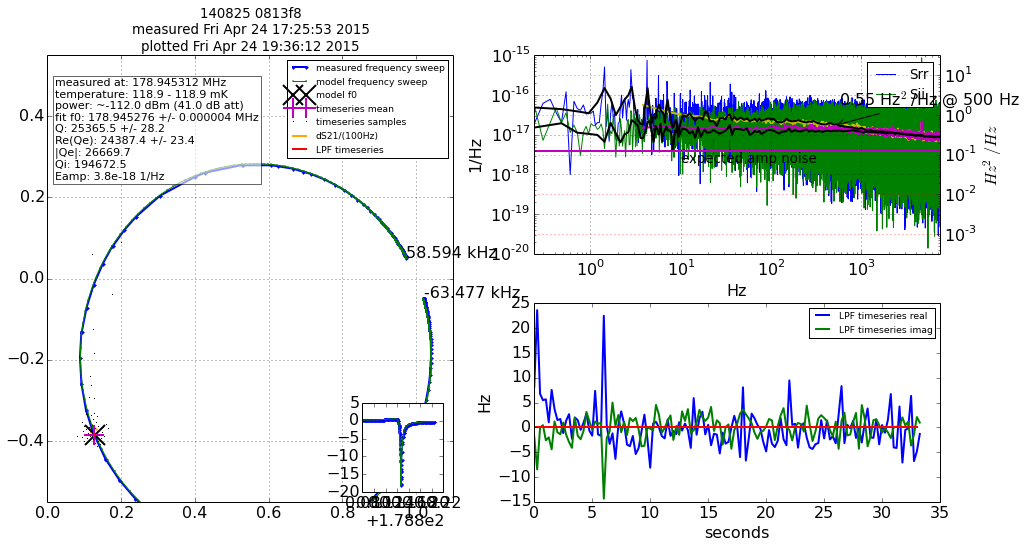

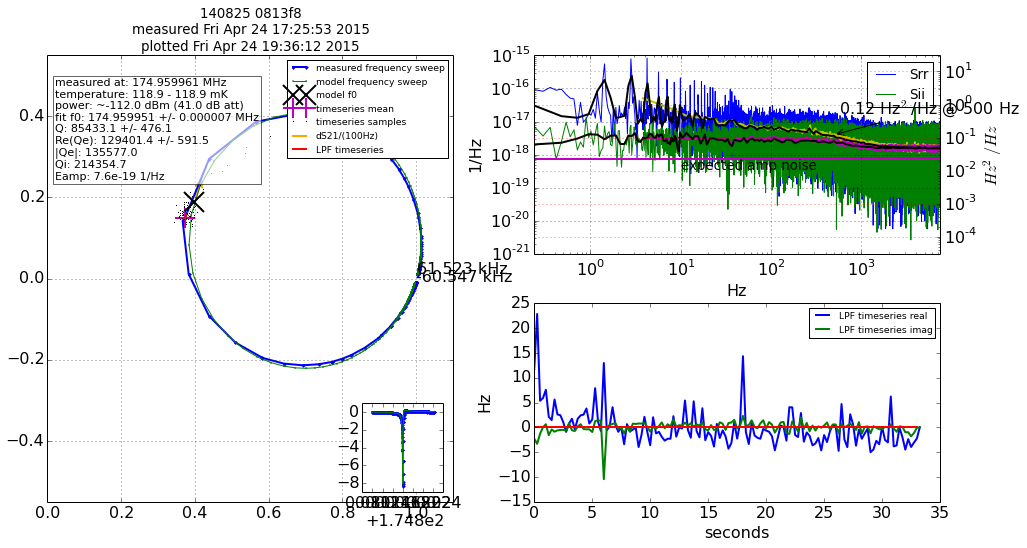

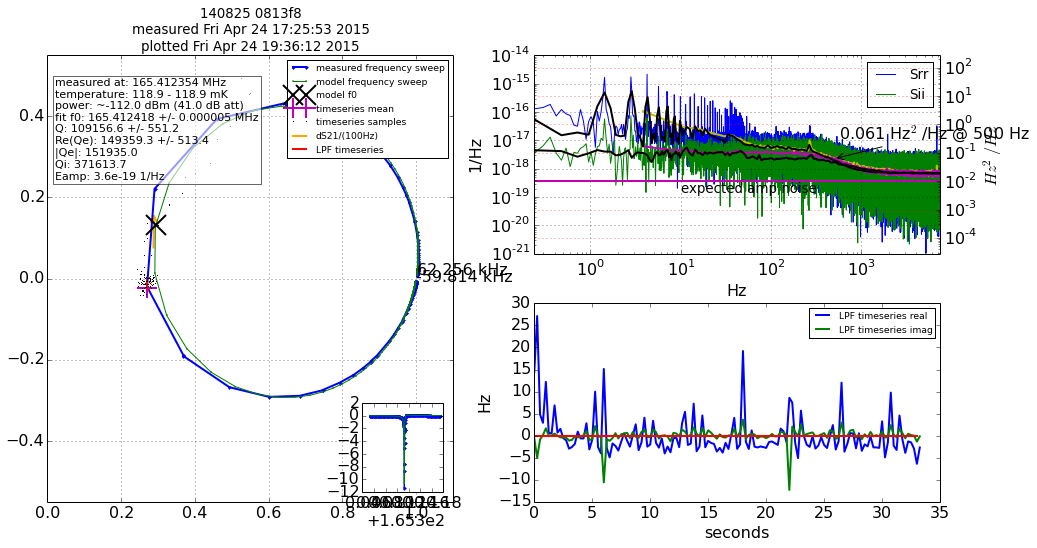

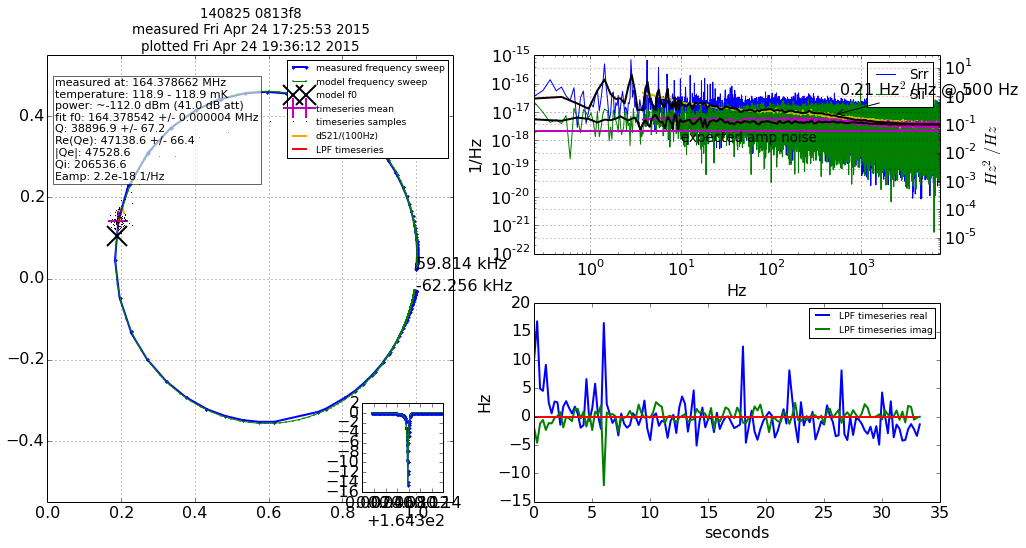

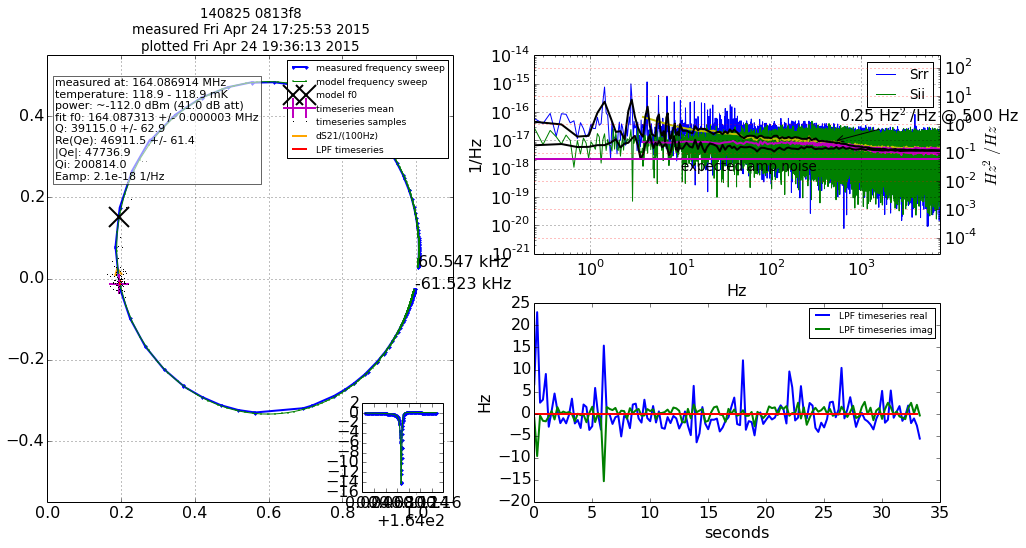

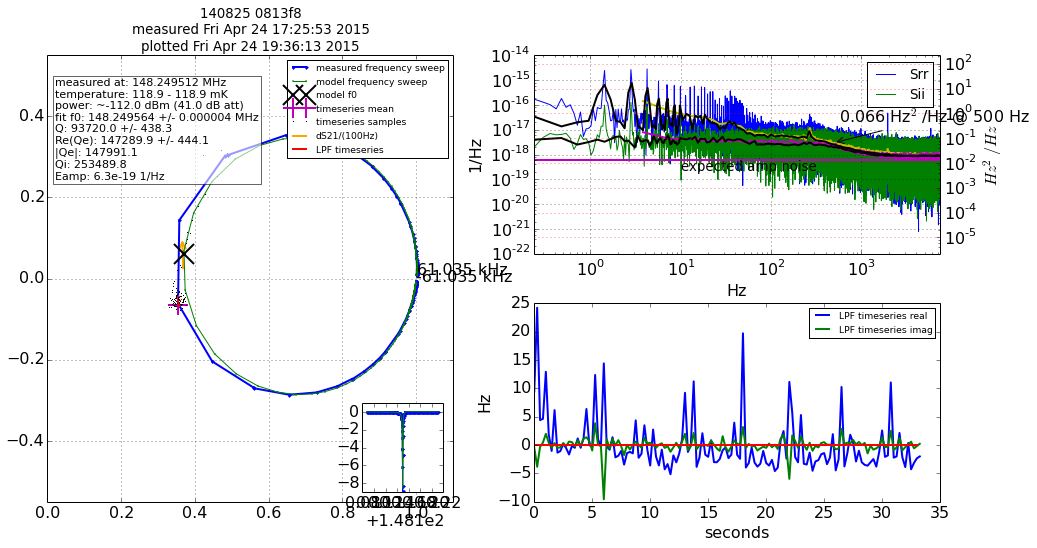

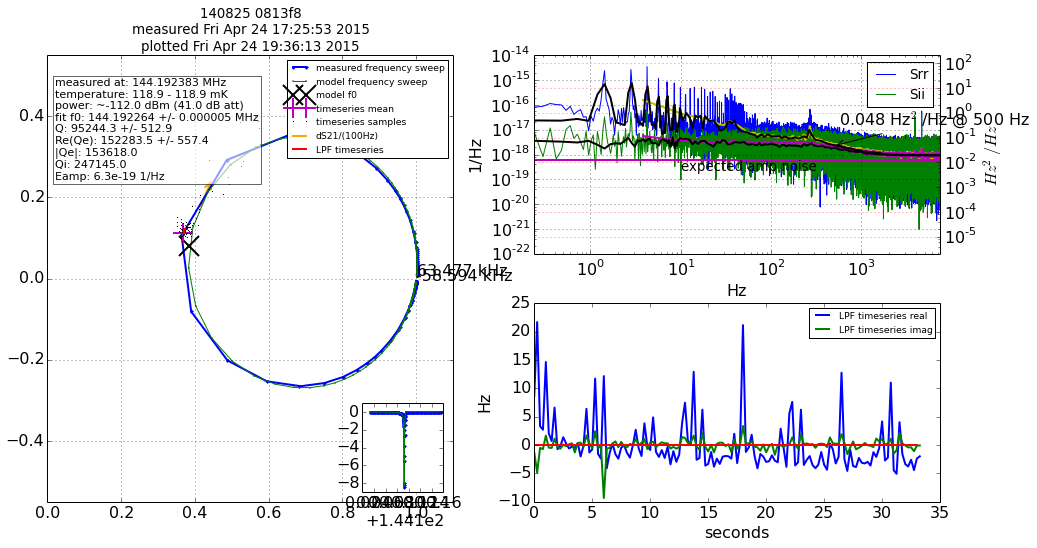

In [183]:
for off in offs:
    blah=off.plot()

In [184]:
ffoffs = [nm.fractional_fluctuation_timeseries for nm in offs]

In [185]:
off6 = ffoffs[6]

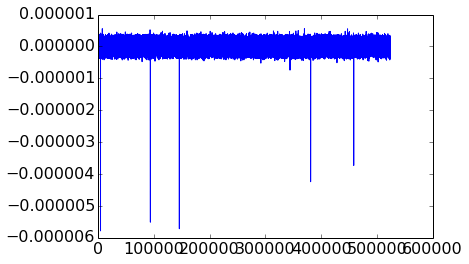

In [202]:
plot(off6.imag)

In [203]:
ofl6 = low_pass_fir(off6,num_taps=1024,cutoff=1/8.)

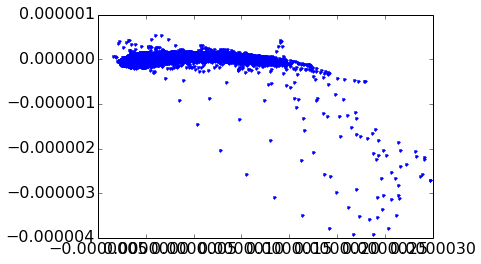

In [206]:
plot(ofl6.real,ofl6.imag,'.')

In [189]:
a = np.vstack([x[:100] for x in ffoffs])

In [190]:
a.shape

(16, 100)

In [246]:
11.55*12

138.60000000000002

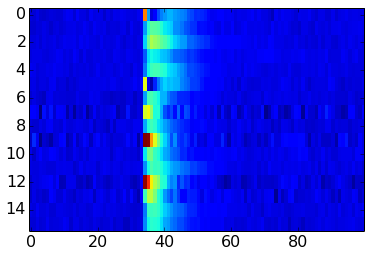

In [196]:
imshow(a.real,aspect='auto',interpolation='nearest')

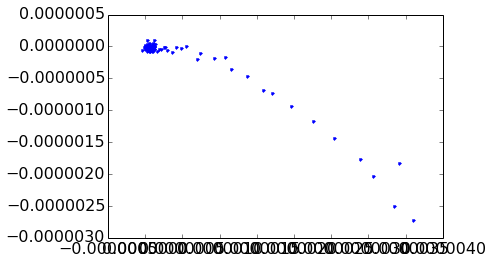

In [200]:
plot(a.mean(0).real,a.mean(0).imag,'.')

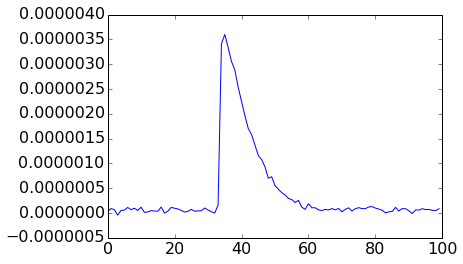

In [201]:
plot(a.mean(0).real)

In [208]:
import sklearn.decomposition

In [209]:
pca = sklearn.decomposition.PCA()

In [219]:
xpca=pca.fit_transform(a.imag.T)

In [220]:
xpca.shape

(100, 16)

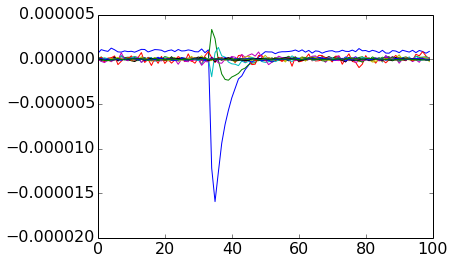

In [222]:
plot(xpca)

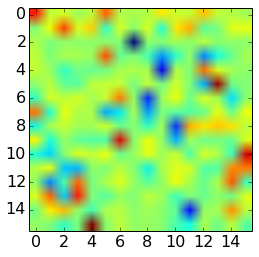

In [229]:
imshow(pca.components_)

In [243]:
pca.explained_variance_

array([  8.46863031e-12,   4.50387855e-13,   1.31781982e-13,
         1.05982287e-13,   7.27290610e-14,   2.81893514e-14,
         1.50610708e-14,   1.36070998e-14,   1.32150625e-14,
         1.05270906e-14,   8.00953508e-15,   6.90013961e-15,
         5.95332914e-15,   5.36406695e-15,   4.21271116e-15,
         3.43944843e-15], dtype=float32)

In [244]:
pca.explained_variance_ratio_

array([  9.06318367e-01,   4.82008010e-02,   1.41033940e-02,
         1.13422936e-02,   7.78351165e-03,   3.01684276e-03,
         1.61184568e-03,   1.45624066e-03,   1.41428458e-03,
         1.12661615e-03,   8.57185689e-04,   7.38457427e-04,
         6.37129182e-04,   5.74065954e-04,   4.50847088e-04,
         3.68092005e-04], dtype=float32)

In [245]:
16*6*16

1536